
# [KDT] ch7 Unsupervised Learning

### Clustering / PCA / Association Rule 

 - 데이터셋: 직장인 연봉 정보 / 보스톤 집값 / 식료품 정보 데이터셋 
 - 주요 라이브러리: sklearn linear_model / sklearn.decomposition / mlxtend.preprocessing 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [51]:
import os
os.getcwd()

'C:\\Users\\강지윤\\Desktop\\인공지능기초'

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
# 원본 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')

## $\alpha$(알파) 퀴즈:

직장인 연봉 정보 데이터셋을 바탕으로 군집분석을 진행하고자 한다.
<br> 군집분석 진행 전 워밍업으로 지표간 거리 구하기 문제를 풀어 보고자 한다.

<br>p(x1, y1), q(x2, y2) 일때 上) 맨허튼 거리, 下) 유클리드 거리 수식은 아래와 같다

 $$d\left( p,q\right)   = |x_{1}-x_{2}| + |y_{1}-y_{2}| $$

$$d\left( p,q\right)   = \sqrt {  \left( x_{1}-x_{2}\right)^2 + \left( y_{1}-y_{2}\right)^2} $$

In [55]:
df_hk.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [56]:
#첫번째 데이터인 hkd1
df_hk.iloc[0, 8:10]

salary         4100
expenditure    1975
Name: 0, dtype: object

In [37]:
#두번째 데이터인 hkd10 의 정보값
df_hk.iloc[1, 8:10]

salary         4720
expenditure    2970
Name: 1, dtype: object

<b>quiz1)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 맨허튼거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [38]:
abs(4100-4720) + abs(1975-2970)

1615

<b>quiz2)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 유클리드 거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [39]:
(((4100-4720)**2) + (1975-2970)**2)**0.5

1172.358733494147

## 1-0 Clustering 전처리

df_hk 데이터 셋 250개 샘플을 활용하여 군집을 만들어 세그먼트 분석을 하고자 한다. 
<br> 먼저 계층형 군집분석을 진행한다.  
<br> 군집분석시 활용할 변수는 <b>gender, age, company, grades, salary, expenditure</b> 이다.   
<br> 이때 수치형 변수 age, salary, expenditure는 정규화를 진행하고 정규화한 칼럼은 각각 age_st, salary_st, expenditure_st로 명명한다
<br> 명목형 변수 gender, company, grades는 더미변수화 한다.(drop_first 옵션 false, 순서는 표기된 대로 진행할 것) 
<br> 전체 데이터셋 순서는 표준화한 age, salary, expenditure와 나머지 gender, company, grades 더미변수다.  

<br>
<br> 위 전처리를 마친 후 데이터셋 이름은 <b>basetable1</b>로 명명한다

In [57]:
df_hk.shape

# df 생성
df_hk_1= df_hk[['gender', "age", "company", "grades", "salary", "expenditure" ]]

# StandardScaling ['age', 'salary', 'expenditure']
from sklearn.preprocessing import StandardScaler
st = StandardScaler().fit( df_hk_1[['age', 'salary', 'expenditure']])
st_table = pd.DataFrame(st.transform(df_hk_1[['age', 'salary', 'expenditure']]), columns=['age_st', 'salary_st', 'expenditure_st'])

# get_dummies ['gender', 'company', 'grades']
df_dummy = pd.get_dummies( df_hk_1[['gender', 'company', 'grades']])

# basetable1
basetable1 = pd.concat( [df_hk_1, st_table, df_dummy], axis=1)
basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1


In [11]:
df_hk.shape

(250, 10)

In [12]:
# df 생성
df = df_hk[['gender', 'age', 'company', 'grades', 'salary', 'expenditure']].copy()

In [13]:
# StandardScaling ['age', 'salary', 'expenditure']
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(df[['age','salary','expenditure']])
Transformed_data = sc.transform(df[['age','salary','expenditure']])
Transformed_data[:5]
df_sc = pd.DataFrame(Transformed_data,columns= [s+'_st' for s in sc.feature_names_in_])

In [14]:
# get_dummies ['gender', 'company', 'grades']
df = pd.get_dummies(df,columns=['gender','company','grades'])

In [15]:
# basetable1
basetable1 = pd.concat([df,df_sc],axis=1)

In [16]:
basetable1[:5]

,age,salary,expenditure,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,age_st,salary_st,expenditure_st
0,22,4100,1975,1,0,1,0,0,1,0,0,0,0,-1.996162,-1.222845,-1.613278
1,31,4720,2970,1,0,1,0,0,0,1,0,0,0,-0.954082,-0.887000,-1.077579
2,55,7280,5905,1,0,1,0,0,0,1,0,0,0,1.824798,0.499716,0.502599
3,28,4060,2935,1,0,0,1,0,0,1,0,0,0,-1.301442,-1.244513,-1.096422
4,29,4390,4015,0,1,0,1,0,0,0,0,0,1,-1.185655,-1.065756,-0.514960


In [17]:
basetable1.describe().round(3)

,age,salary,expenditure,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,age_st,salary_st,expenditure_st
count,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000,250.000
mean,39.240,6357.480,4971.480,0.448,0.552,0.400,0.400,0.200,0.316,0.464,0.128,0.064,0.028,-0.000,0.000,0.000
std,8.654,1849.791,1861.113,0.498,0.498,0.491,0.491,0.401,0.466,0.500,0.335,0.245,0.165,1.002,1.002,1.002
min,20.000,3080.000,1330.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.228,-1.775,-1.961
25%,33.000,5002.500,3593.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.723,-0.734,-0.742
50%,39.000,6100.000,4762.500,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.028,-0.139,-0.113
75%,46.000,7427.500,6272.500,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.783,0.580,0.700
max,55.000,11990.000,10865.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.825,3.051,3.173


## 1-1. Clustering - Hierarchical Clustering

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 Hierarchical 군집분석을 시행한다
<br>(sklearn AgglomerativeClustering 진행) 

In [59]:
# 대상 df 생성, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수
basetable1_cluster_1 = basetable1.iloc[:,6:]
basetable1_cluster_1[:5]

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1


In [60]:
# AgglomerativeClustering
cluster_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(X = basetable1_cluster_1)

In [21]:
# Attribute


In [61]:
# cluster_1.labels_
cluster_1.labels_

array([2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 계층형 군집분석 시각화: dendrogram(60개 샘플 대상)  

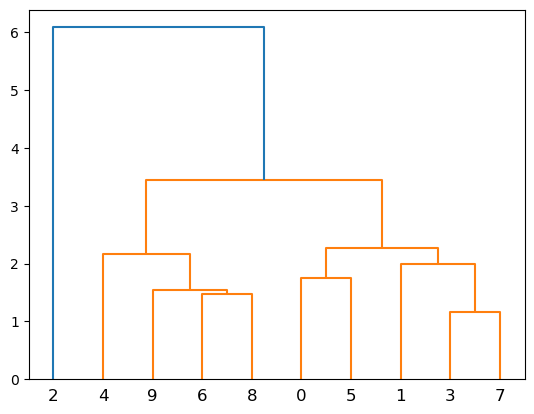

[[ 3.          7.          1.16776141  2.        ]
 [ 6.          8.          1.4744076   2.        ]
 [ 9.         11.          1.54646993  3.        ]
 [ 0.          5.          1.74687666  2.        ]
 [ 1.         10.          1.99897105  3.        ]
 [ 4.         12.          2.16286058  4.        ]
 [13.         14.          2.27794512  5.        ]
 [15.         16.          3.45189526  9.        ]
 [ 2.         17.          6.08959283 10.        ]]


In [71]:
# dendrogram 그리기 (10개)

from scipy.cluster.hierarchy import dendrogram, linkage

link_10 = linkage(basetable1_cluster_1.iloc[:10, ], 'ward')
dendrogram(link_10) 
plt.show()
print(link_10) # link : cluster링 결과, 처음 두 개는 행 번호, 거리, 클러스터에 속한 데이터 수

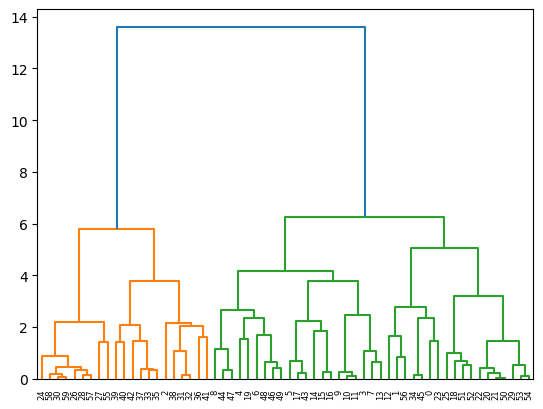

[[2.10000000e+01 5.00000000e+01 2.29119966e-02 2.00000000e+00]
 [3.00000000e+01 5.90000000e+01 8.40106540e-02 2.00000000e+00]
 [1.00000000e+01 1.10000000e+01 1.16038269e-01 2.00000000e+00]
 [5.30000000e+01 5.40000000e+01 1.21921171e-01 2.00000000e+00]
 [2.80000000e+01 5.70000000e+01 1.29834647e-01 2.00000000e+00]]


In [72]:
# dendrogram 그리기 (60개)
link_60 = linkage(basetable1_cluster_1.iloc[:60, ], 'ward')
dendrogram(link_60) 
plt.show()
print(link_60[:5]) # link : cluster링 결과, 처음 두 개는 행 번호, 거리, 클러스터에 속한 데이터 수

In [73]:
# 예측, 새로운 정보값으로 예측할때 사용
# basetable1['cluster_hier'] 
basetable1['cluster_hier'] =cluster_1.fit_predict(basetable1_cluster_1)

basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0,2
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0,1
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0,2
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1,2


In [74]:
(cluster_1.labels_ == basetable1['cluster_hier'])

0      True
1      True
2      True
3      True
4      True
       ... 
245    True
246    True
247    True
248    True
249    True
Name: cluster_hier, Length: 250, dtype: bool

In [75]:
# 타겟값 맵핑 {0:'a', 1:'b', 2:'c'}
basetable1['cluster_hier'] = basetable1['cluster_hier'].map({0:'a',1:'b',2:'c'})
basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0,c
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0,b
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0,a
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0,c
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1,c


In [77]:
pd.crosstab(basetable1['company'],basetable1['cluster_hier'])

cluster_hier,a,b,c
company,,,
A,42,35,23
B,7,53,40
C,31,0,19


### cluster / company에 따른 scatter plot 

Text(0.5, 1.0, 'category : hierarchy cluster')

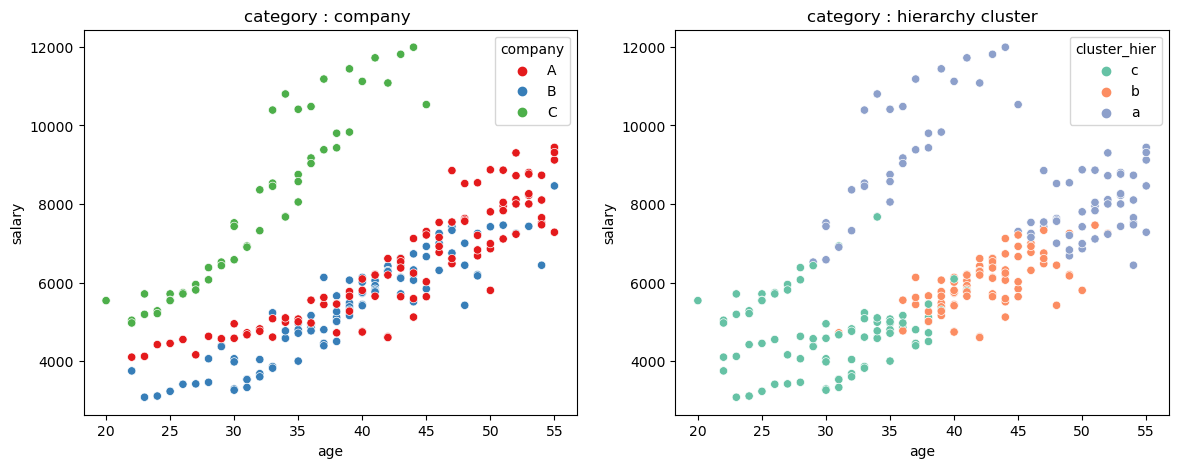

In [76]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',  palette='Set1', ax= ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',  palette='Set2', ax=ax[1] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')

hierarchy cluster는 군집 A: 고 연령 / 고 연봉 , 군집 B: 중상 연령, 중저 연봉, 군집 C: 저 연령 / 저 연봉 으로 분류

In [78]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].mean()

,age,salary,expenditure
cluster_hier,,,
a,45.112500,8479.375000,7107.500000
b,42.147727,5948.409091,4610.340909
c,30.390244,4726.341463,3275.121951


In [79]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].describe()

age                                                       \
             count       mean       std   min    25%   50%    75%   max   
cluster_hier                                                              
a             80.0  45.112500  8.173736  29.0  37.00  48.0  52.00  55.0   
b             88.0  42.147727  3.893820  31.0  39.75  42.0  44.25  52.0   
c             82.0  30.390244  5.122586  20.0  26.00  30.5  34.00  41.0   

             salary               ...                  expenditure  \
              count         mean  ...     75%      max       count   
cluster_hier                      ...                                
a              80.0  8479.375000  ...  9202.5  11990.0        80.0   
b              88.0  5948.409091  ...  6382.5   7460.0        88.0   
c              82.0  4726.341463  ...  5205.0   7670.0        82.0   

                                                                          \
                     mean          std     min      25%     50%      75%   
cluster_hier                                                               
a             7107.500000  1299.693976  4865.0  6271.25  6800.0  7508.75   
b             4610.340909   791.327560  2970.0  4042.50  4742.5  5171.25   
c             3275.121951   875.562597  1330.0  2697.50  3212.5  3878.75   

                       
                  max  
cluster_hier           
a             10865.0  
b              6500.0  
c              5630.0  

[3 rows x 24 columns]

## 1-2. Clustering - K means

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 K-means 군집분석을 시행한다
<br> (sklearn KMeans 진행, n_cluster = 3, random_state=123)

In [80]:
# basetable_cluster_1 (df, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수)
basetable1_cluster_1[:2]

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0


In [81]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

<b><kmeans split 에러시 threadpoolctl 업그레이드 필요> </b>
<br>!pip install threadpoolctl --user --upgrade
<br>import threadpoolctl
<br>threadpoolctl.__version__ <- 3.0 이상 필요 

In [ ]:
!pip install threadpoolctl --user --upgrade

In [82]:
# K-means 모델 n_clusters=3, random_state=123
cluster_1_2 = KMeans(init = 'k-means++',random_state=123, n_clusters = 3).fit(basetable1_cluster_1)
cluster_1_2

KMeans(n_clusters=3, random_state=123)

In [83]:
# Attribute 확인
cluster_1_2.inertia_
#elbow method 그릴 떄 필요 : 작으면 작을 수록 좋다.
# k 가 늘어나면 늘어날수록 작아진다.

638.8469482817075

In [84]:
#k - means 라벨값 
basetable1['cluster_kmean'] = cluster_1_2.labels_


In [85]:
# crosstab 'cluster_hier' 'cluster_kmean'
pd.crosstab(basetable1['cluster_hier'],basetable1['cluster_kmean'])

cluster_kmean,0,1,2
cluster_hier,,,
a,3,28,49
b,38,0,50
c,81,1,0


In [86]:
# crosstab 'company' 'cluster_kmean'
pd.crosstab(basetable1['company'],basetable1['cluster_kmean'])


cluster_kmean,0,1,2
company,,,
A,36,0,64
B,65,0,35
C,21,29,0


Figure(1600x500)


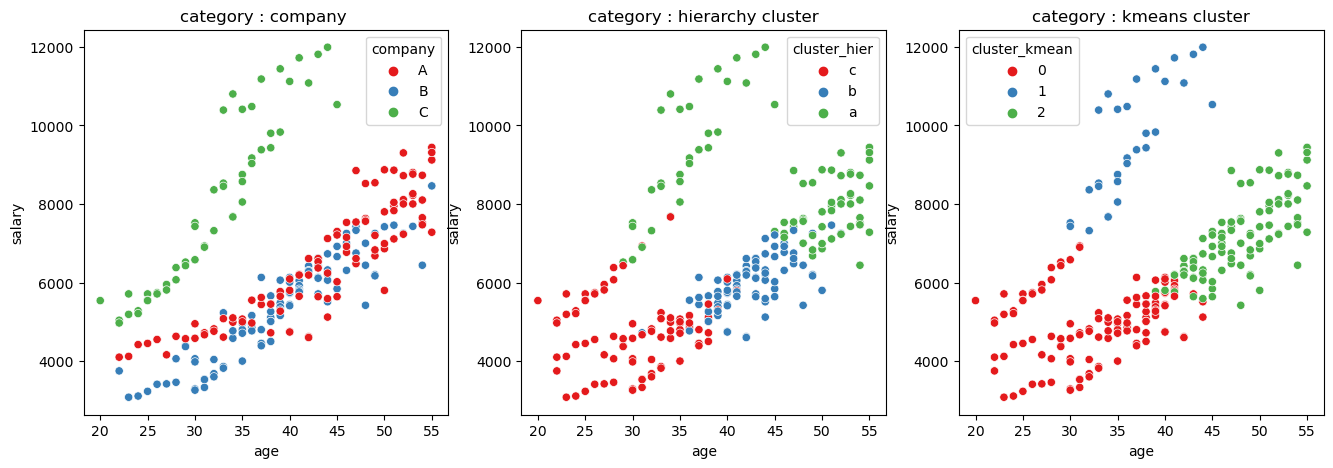

In [87]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(16, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',        palette='Set1', ax=ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',   palette='Set1', ax=ax[1] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_kmean',  palette='Set1', ax=ax[2] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')
ax[2].set_title('category : kmeans cluster')
print(fig)
plt.show()

## 1-4. Clustering 평가 - Elbow score
- kmeans inertia_ 활용

Inertia 값, 군집화후 각 중심점에서 군집의 데이타간 거리를 합산한것으로 응집도를 나타내는 값 

값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있음

In [89]:
# n_clusters=k를 1부터 10까지 적용

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(basetable1_cluster_1) 
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    print('k값 ', k , '=>', kmeanModel.inertia_)

k값  1 => 1199.5439999999999
k값  2 => 775.9317969906917
k값  3 => 638.7205567342011
k값  4 => 550.6283433805727
k값  5 => 497.1875272234091
k값  6 => 448.4038912625669
k값  7 => 413.6478550268853
k값  8 => 386.4847171108105
k값  9 => 363.01589524981773


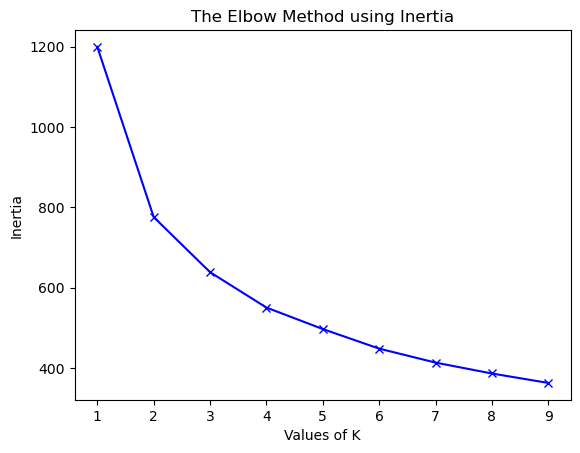

In [90]:
# Elbow score 시각화
plt.plot(np.arange(1, 10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## 1-5. Clustering 평가 - Silhouette Test

silhouette score는 1에 가까워야 positive

In [91]:
from sklearn.metrics import silhouette_score

In [94]:
k_score = pd.DataFrame(columns =['k', 'score'])
for i in np.arange(2, 7):
    model_clustering = KMeans( n_clusters=i, random_state=123).fit(basetable1_cluster_1)
    a = silhouette_score( basetable1_cluster_1,model_clustering.labels_)
    k = pd.DataFrame({'k':[i], 'score':[a]})
    k_score = pd.concat([k_score, k]).reset_index(drop=True)
    print("K값 ", i, " silhouette score: ", a.round(3) )

K값  2  silhouette score:  0.292
K값  3  silhouette score:  0.278
K값  4  silhouette score:  0.218
K값  5  silhouette score:  0.224
K값  6  silhouette score:  0.236


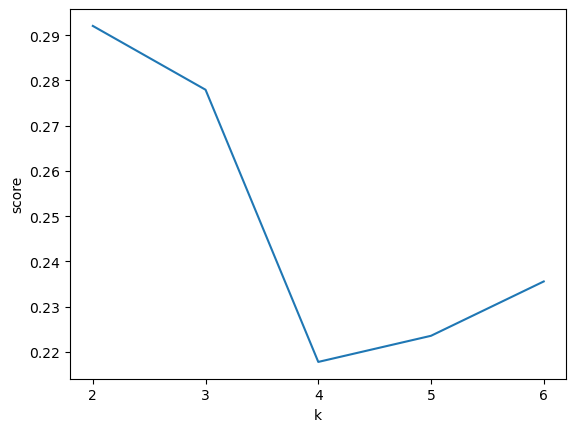

In [95]:
sns.lineplot(x='k', y='score', data=k_score)
plt.xticks([2, 3, 4, 5, 6])
plt.show()

### K 값에 따른 scatter plot

In [97]:
# K값 2~5까지 cluster_model, cluster_label 생성
cluster_model_k1 = KMeans( n_clusters=2, random_state=123).fit(basetable1_cluster_1)
cluster_model_k2 = KMeans( n_clusters=3, random_state=123).fit(basetable1_cluster_1)
cluster_model_k3 = KMeans( n_clusters=4, random_state=123).fit(basetable1_cluster_1)
cluster_model_k4 = KMeans( n_clusters=5, random_state=123).fit(basetable1_cluster_1)

cluster_plot = basetable1.copy()
cluster_plot['cluster_k1'] = cluster_model_k1.labels_
cluster_plot['cluster_k2'] = cluster_model_k2.labels_
cluster_plot['cluster_k3'] = cluster_model_k3.labels_
cluster_plot['cluster_k4'] = cluster_model_k4.labels_

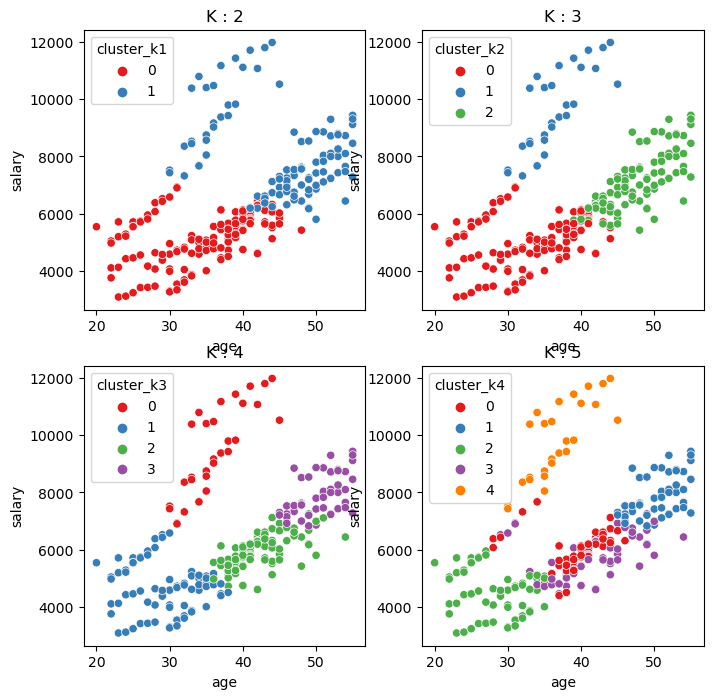

In [98]:
# K별 Plot 

fig, ax = plt.subplots( nrows= 2 , ncols=2, figsize=(8, 8))
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k1',  palette='Set1', ax= ax[0][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k2',  palette='Set1', ax=ax[0][1] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k3',  palette='Set1', ax=ax[1][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k4',  palette='Set1', ax=ax[1][1] )


ax[0][0].set_title('K : 2')
ax[0][1].set_title('K : 3')
ax[1][0].set_title('K : 4')
ax[1][1].set_title('K : 5')
plt.show()

## 1-6. Clustering 예측

250개 데이터 셋을 바탕으로 군집분석을 실시 하였다.
<br> 250개 외 추가 데이터 셋 샘플을 추가 할 경우, 모델을 바탕으로 기존 군집분석을 바탕으로 Cluster를 분류 할 수 있다. 
<br> 모델은 Kmeans 알고리즘을 통해 3개 cluster로 분류한 cluster_1_2 모델을 활용한다.

<br> 데이터셋 샘플 - 성별:남성 / age:33 / company :C / grades: B / salary : 4500 / expenditure: 2975

<br> <b>작업순서</b>
<br> 1.수치형 변수 표준화 -> 2. 더미변수 확인 -> 3. 데이터 프레임에 맞춰 데이터 셋 준비 -> 4.Cluster 예측 

In [99]:
# basetable1
basetable1.head(3)

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,...,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier,cluster_kmean
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,...,1,0,0,1,0,0,0,0,c,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,...,1,0,0,0,1,0,0,0,b,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,...,1,0,0,0,1,0,0,0,a,2


In [101]:
basetable1_cluster_1.head(3)

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0


In [102]:
#sample_1 나이:33, 연봉:4500, 소비액:2975
sample_1 = pd.DataFrame({'age':[33],'salary':[4500],'expenditure':[2975]})
sample_1

,age,salary,expenditure
0,33,4500,2975


In [103]:
#기존 표준화 모델 활용
sc.transform(sample_1)

array([[-0.72250877, -1.00617084, -1.07488664]])

In [105]:
#sample_1 DataFrame 변경
sample_1_num = pd.DataFrame(st.transform(sample_1),columns=['age_st','salary_st','expenditure_st'])
sample_1_num

,age_st,salary_st,expenditure_st
0,-0.722509,-1.006171,-1.074887


In [116]:
#dummy DataFrame 생성
sample_1_dummy = pd.DataFrame( [[0,0,0,0,0,0,0,0,0,0]], columns = df_dummy.columns)
sample_1_dummy


,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0,0,0,0,0,0,0,0,0,0


In [117]:
#dummy변수 정보값 생성, 'gender_M', 'company_C', 'grades_B'
sample_1_dummy['gender_M']=1
sample_1_dummy['company_C']=1
sample_1_dummy['gender_B']=1

In [118]:
sample_1_dummy

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,gender_B
0,0,1,0,0,1,0,0,0,0,0,1


In [119]:
# 최종 DataFrame 만들기, sample_1_num,  sample_1_dummy concat
predic_sample1 = pd.concat([sample_1_num, sample_1_dummy],axis = 1)
predic_sample1

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,gender_B
0,-0.722509,-1.006171,-1.074887,0,1,0,0,1,0,0,0,0,0,1


In [123]:
# predic_sample1로 cluster 예측
cluster_1_2.predict(predic_sample1.drop(['gender_F'],axis = 1))

array([0])

## Quiz) 추가 예측 

<br> cluster 예측모델로 아래 데이터의 결과를 예측하시오 
<br> 성별:여성 / age:43 / company :B / grades: B / salary : 7900 / expenditure: 6000

In [132]:
# 기존 DataFrame을 사용하여 sample DataFrame 만들기 : to_dict() 활용




st.transform([[43, 7900, 6000]])
# 추가 정보값 입력


array([[0.43535785, 0.83556143, 0.5537458 ]])

In [131]:
basetable1_cluster_1[:1].to_dict()
#z표준화

{'age_st': {0: -1.9961620439438865},
 'salary_st': {0: -1.2228452194331043},
 'expenditure_st': {0: -1.6132775345800814},
 'gender_F': {0: 1},
 'gender_M': {0: 0},
 'company_A': {0: 1},
 'company_B': {0: 0},
 'company_C': {0: 0},
 'grades_A': {0: 1},
 'grades_B': {0: 0},
 'grades_C': {0: 0},
 'grades_D': {0: 0},
 'grades_F': {0: 0}}

In [137]:
predic_sample2 = pd.DataFrame({'age_st': {0: 0.43535785},
 'salary_st': {0: 0.83556143},
 'expenditure_st': {0: 0.5537458},
 'gender_F': {0: 1},
 'gender_M': {0: 0},
 'company_A': {0: 0},
 'company_B': {0: 1},
 'company_C': {0: 0},
 'grades_A': {0: 0},
 'grades_B': {0: 1},
 'grades_C': {0: 0},
 'grades_D': {0: 0},
 'grades_F': {0: 0}})



In [136]:
# 기존방법
sample_2 = pd.DataFrame({'age':[43], 'salary':[7900], 'expenditure':[6000]})
sample_2_num = pd.DataFrame( st.transform(sample_2), columns = ['age_st', 'salary_st', 'expenditure_st'])
sample_2_dummy = pd.DataFrame( [[0, 0,0,0,0,0,0,0,0,0]], columns = df_dummy.columns)
sample_2_dummy['gender_F'][0] = 1
sample_2_dummy['company_B'][0] = 1
sample_2_dummy['grades_B'][0] = 1
predic_sample2 = pd.concat([ sample_2_num, sample_2_dummy], axis=1)
# predic_sample2로 cluster 예측
predic_sample2

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0.435358,0.835561,0.553746,1,0,0,1,0,0,1,0,0,0


In [138]:
# predic_sample2로 cluster 예측
cluster_1_2.predict(predic_sample2)

array([2])

## 2. $\pi$(파이) 퀴즈 : 붓꽃 데이터 셋 활용 Kmeans / Hierachy 

sklearn 라이브러리 활용을 통한 붓꽃 품종 분류 
<br>
<br> 워밍업: x축을 'sepal_length'으로 y축을 'petal_length'로 scatter plot을 도식화 하시오. 
<br> 이때 라이브러리는 seaborn을 활용하고 'species' 그룹에 따라 색깔을 다르게 표현하시오.

In [189]:
# 파일 로딩 
df_iris = pd.read_csv('.\\data\\iris.csv')

In [190]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [191]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


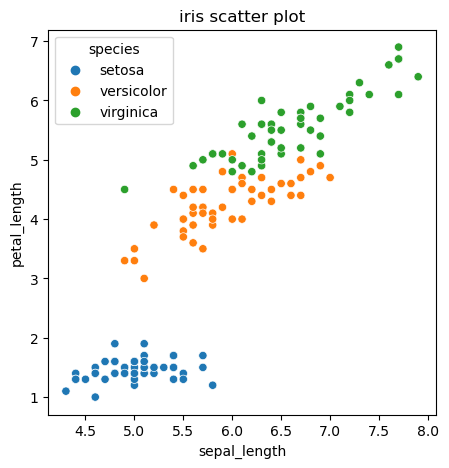

In [192]:
# iris scatter plot, x='sepal_length',  y='petal_length'

fig  = plt.figure( figsize=(5, 5))
sns.scatterplot( data =df_iris, x='sepal_length',  y='petal_length', hue='species')

plt.title('iris scatter plot')
plt.show()

<br> 계층형 군집분석을 통해 3개의 군집으로 분류하고자 한다. 
<br> 수치형 4개 변수 모두 활용해 minmax 정규화를 1차로 수행한 후 
<br> sklearn의 AgglomerativeClustering 메소드를 활용, 하이퍼 파라미터값은 하단을 참조하여 군집분석을 수행하라
<br> (n_clusters=3, affinity='manhattan', linkage='average')
<br>
<br><b> 문제: 3개 클러스터별 'sepal_length' 평균을 확인하고 평균값이 가장 높은 클러스터의 'sepal_length' 평균을 구하라</b>

In [193]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

In [194]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [203]:
iris_scaler = MinMaxScaler()
iris_scaler.fit_transform(df_iris.drop('species', axis=1))
df_iris_sc = pd.DataFrame( iris_scaler.fit_transform(df_iris.drop('species', axis=1)), columns = df_iris.columns[:-1])

In [204]:
df_iris_sc

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [205]:
# AgglomerativeClustering, (n_clusters=3, affinity='manhattan', linkage='average')
model_2 = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average').fit(df_iris_sc)

In [206]:
model_2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

In [208]:
df_iris['cluster'] = model_2.labels_
df_iris.groupby('cluster')['sepal_length'].mean().nlargest()

cluster
0    6.965517
2    5.974648
1    5.006000
Name: sepal_length, dtype: float64

In [209]:
# pd.crosstab
pd.crosstab(df_iris['species'], df_iris['cluster']) # setosa는 구분이 잘 됬고, versicolor, virginica 일부 중첩

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,0,0,50
virginica,29,0,21


<AxesSubplot:xlabel='cluster', ylabel='sepal_width'>

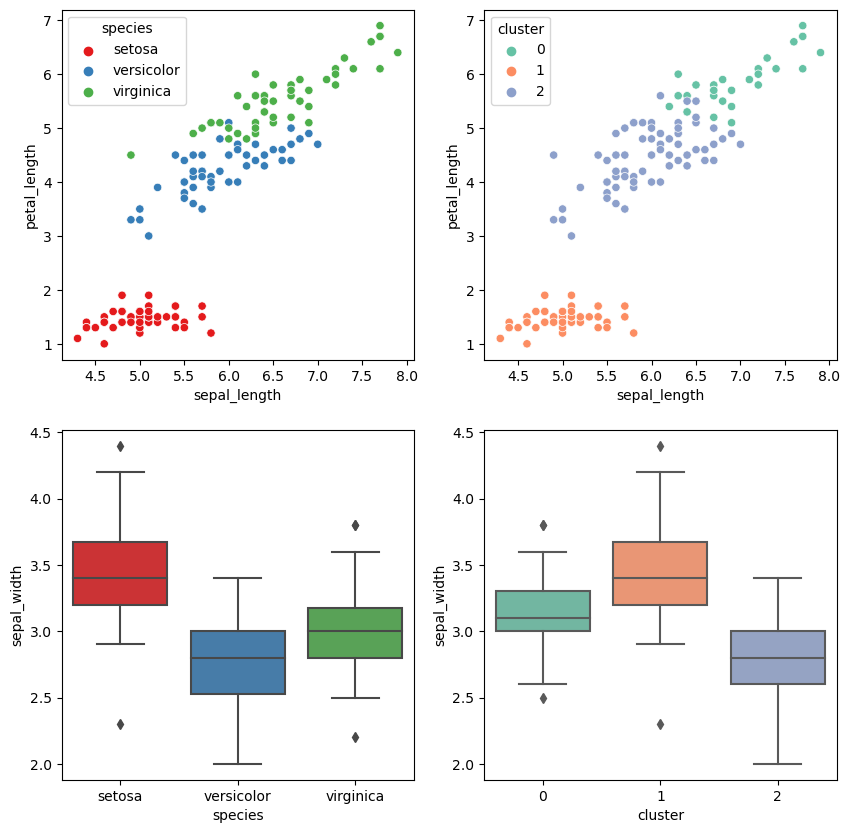

In [210]:
# 시각화
fig, ax = plt.subplots( nrows= 2 , ncols=2,  figsize=(10,10))

sns.scatterplot( data = df_iris, x='sepal_length',  y='petal_length', hue='species' , palette='Set1', ax= ax[0][0])
sns.scatterplot( data = df_iris,  x='sepal_length',  y='petal_length', hue='cluster', palette='Set2',ax= ax[0][1])
sns.boxplot( data = df_iris, x='species', y='sepal_width' , palette='Set1', ax= ax[1][0])
sns.boxplot( data = df_iris, x='cluster', y='sepal_width' , palette='Set2', ax= ax[1][1])

#### (추가) 집단간 sepal_length 평균 차이가 통계적으로 유의미하게 차이 나는지 확인해 보기 

<br> species가 versicolor 인 데이터셋과 이와 유사한 클러스터와 sepal_length 평균 차이 확인해 본다.
<br> shapiro 메소드를 통해 정규성을 확인하고 scipy의 ttest_ind 메소드를 활용할 것 

In [211]:
from scipy.stats import shapiro, ttest_ind

# p-vaue 0.05 이상이면 정규성 만족 
a = df_iris.loc[ df_iris['species']=='versicolor', 'sepal_length']
b = df_iris.loc[ df_iris['cluster']==2, 'sepal_length']

# shapiro Test, p-vaue 0.05 이상이면 정규성 만족 
print( shapiro(a))
print( shapiro(b)) 

# 두 집단의 평균의 차이, ttest_ind
ttest_ind( a, b) # p_value 0.05 초과, 귀무가설 채택, 차이 없다 
print( 'ttest_ind Result: ', ttest_ind( a, b))

print( 'a.mean(): ', a.mean())
print( 'b.mean(): ', b.mean())

ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)
ShapiroResult(statistic=0.9824140667915344, pvalue=0.4217180013656616)
ttest_ind Result:  Ttest_indResult(statistic=-0.4215216515103207, pvalue=0.6741346439118632)
a.mean():  5.936
b.mean():  5.974647887323944


## 3. PCA 

<br> 주성분 분석(Principal Component Analysis, PCA) 가장 널리 사용되는 차원 축소 기법 중 하나
<br> iris 데이터 활용 

In [215]:
#  df 생성
df_iris_2 = df_iris.iloc[:,:4]
df_iris_2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

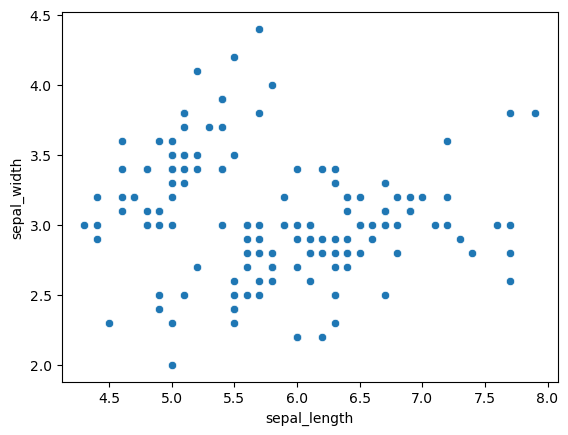

In [216]:
sns.scatterplot('sepal_length', 'sepal_width', data=df_iris_2)

In [221]:
#정규화
iris_std= StandardScaler().fit_transform(df_iris_2)
df_iris_std = pd.DataFrame(iris_std,columns = df_iris_2.columns)
df_iris_std.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,-0.900681,-1.143017,-1.385353,-1.506521,-1.021849,-0.537178,-1.506521,-1.021849,-1.748856,-1.143017,...,1.038005,1.280340,-0.052506,1.159173,1.038005,1.038005,0.553333,0.795669,0.432165,0.068662
sepal_width,1.019004,-0.131979,0.328414,0.098217,1.249201,1.939791,0.788808,0.788808,-0.362176,0.098217,...,0.098217,0.098217,-0.822570,0.328414,0.558611,-0.131979,-1.282963,-0.131979,0.788808,-0.131979
petal_length,-1.340227,-1.340227,-1.397064,-1.283389,-1.340227,-1.169714,-1.340227,-1.283389,-1.340227,-1.283389,...,1.046945,0.762758,0.762758,1.217458,1.103783,0.819596,0.705921,0.819596,0.933271,0.762758
petal_width,-1.315444,-1.315444,-1.315444,-1.315444,-1.315444,-1.052180,-1.183812,-1.315444,-1.315444,-1.447076,...,1.580464,1.448832,0.922303,1.448832,1.712096,1.448832,0.922303,1.053935,1.448832,0.790671


In [222]:
#공분산행렬 확인 
import numpy as np 
cov_matrix = np.cov(df_iris_std.T)

In [223]:
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [226]:
##고유값(분산설명력, explained_variance), 고유벡터 추출(사영계수, components), eigen vector를 구하는 함수
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [228]:
#고유값(분산설명력, explained_variance)
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [230]:
#고유벡터 추출(사영계수, components)
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [235]:
pca_iris = pd.DataFrame({'pca1':df_iris_std @ eigenvectors.T[0], 'pca2':df_iris_std @ eigenvectors.T[1], 
                         'pca3':df_iris_std @ eigenvectors.T[2], 'pca4':df_iris_std @ eigenvectors.T[3]})
#@ => 행렬곱

In [236]:
pca_iris

,pca1,pca2,pca3,pca4
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923
...,...,...,...,...
145,1.870503,-0.386966,0.256274,0.389257
146,1.564580,0.896687,-0.026371,0.220192
147,1.521170,-0.269069,0.180178,0.119171
148,1.372788,-1.011254,0.933395,0.026129


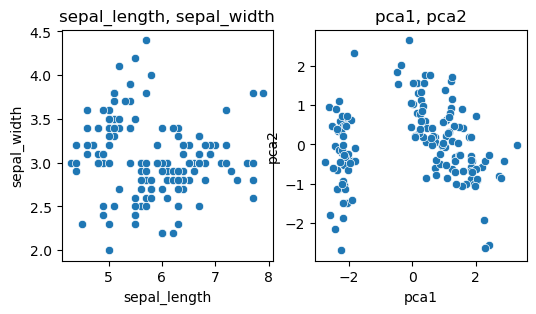

In [237]:
# 시각화 비교 
fig, ax = plt.subplots( nrows= 1 , ncols=2,  figsize=(6,3))

sns.scatterplot('sepal_length', 'sepal_width', data=df_iris_2,   ax= ax[0])
sns.scatterplot('pca1', 'pca2',                data=pca_iris,    ax= ax[1])

ax[0].set_title('sepal_length, sepal_width')
ax[1].set_title('pca1, pca2')

plt.show()

In [238]:
#PCA 라이브러리 
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

pc = PCA().fit(df_iris_std)

In [241]:
pc.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [244]:
#고유값(분산설명력, explained_variance), eigenvalues 비교
pc.explained_variance_, eigenvalues

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]))

In [245]:
#고유벡터 확인(사영계수, components)
pc.components_, eigenvectors

(array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
        [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
        [-0.26128628,  0.12350962,  0.80144925, -0.52359713]]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [247]:
#pca1
df_iris_std @ pc.components_[0]

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Length: 150, dtype: float64

In [249]:
# eigenvectors로 계산한것과 비교
pca_iris[:5]

,pca1,pca2,pca3,pca4
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923


In [253]:
# transform으로 PCA 계산, df_iris_std @ pc.components_[0]
pc.transform(df_iris_std)
pd.DataFrame(pc.transform(df_iris_std), columns=['PCA1','PCA2','PCA3','PCA4'])[:5]

,PCA1,PCA2,PCA3,PCA4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [ ]:
# 누적 분산 설명력(explained_variance_ratio_)


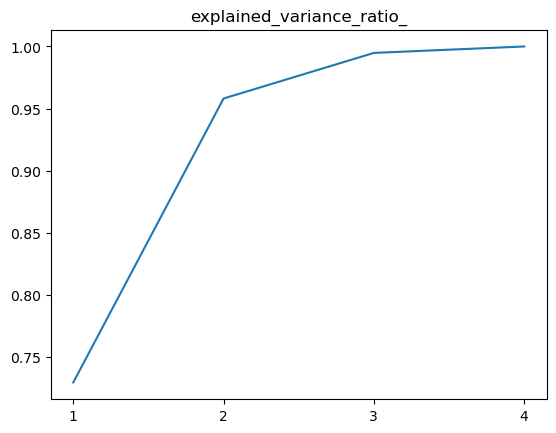

In [254]:
# 누적 분산 설명력(explained_variance_ratio_) 시각화
sns.lineplot(x = [1,2,3,4], y=pc.explained_variance_ratio_.cumsum())
plt.xticks([1,2,3,4])
plt.title('explained_variance_ratio_')
plt.show()

### 콘크리트 데이터 셋 활용, PCA 통해 만든 합성변수로 종속변수 strength을 예측하는 다중 회귀 분석 모델 설계
<br>1030 rows × 9 columns
<br> 라이브러리 : from sklearn.decomposition import PCA

In [255]:
# brick_concrete.csv 파일 로딩
df_brick = pd.read_csv('.\\data\\yellowbrick_concrete.csv')

In [256]:
df_brick

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [257]:
df_brick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


각 변수별 상관계수 매트릭스 플롯 시각화 

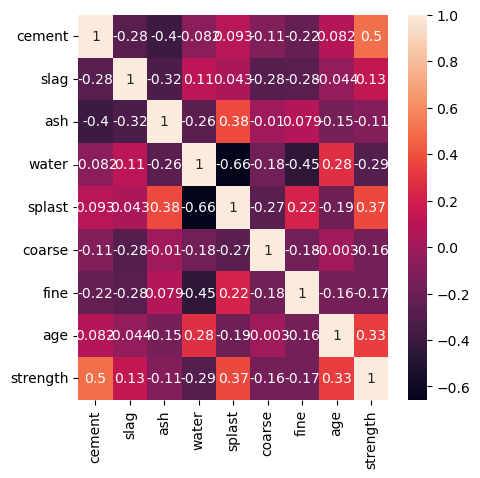

In [258]:
# heatmap
fig = plt.figure( figsize=(5,5))

sns.heatmap( df_brick.corr(), annot=True)
plt.show()

In [259]:
df_brick.corr()

,cement,slag,ash,water,splast,coarse,fine,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
splast,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [260]:
#다중 공선성 VIF 로 feature 특성 파악
# case1

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = df_brick.columns
vif['VIF'] = [variance_inflation_factor(df_brick.values, i) for i in range(df_brick.shape[1])]
vif.sort_values('VIF', ascending = False)

,features,VIF
3,water,92.512523
5,coarse,85.900013
6,fine,73.522864
0,cement,26.248178
8,strength,14.555916
4,splast,5.520316
2,ash,4.561734
1,slag,4.444466
7,age,2.434882


VIF 지수가 10 초과하는 변수들이 다수 존재 
<br> PCA를 통해 차원 축소, 복잡성을 줄이자!

PCA 프로세스
<br>1.정규화 -> 2. 공분산 행렬 계산 -> 3. 공분산 행렬 고유벡터와 고유값 계산 -> 4. 주성분 구하기

### 1.정규화

In [262]:
# 정규화
# 정규화
sc3 = StandardScaler()
df_brick_sc = pd.DataFrame( sc3.fit_transform( df_brick.drop('strength', axis=1)), columns =  df_brick.drop('strength', axis=1).columns )
df_brick_sc[:5]

,cement,slag,ash,water,splast,coarse,fine,age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


### 2. 공분산 행렬 계산 / 3. 공분산 행렬 고유벡터와 고유값 계산
sklearn.decomposition 라이브러리를 통해 자동 추출

In [ ]:
from sklearn.decomposition import PCA

In [264]:
#고유값  
# pd.Series( pca_model.explained_variance_ )
pca_model=PCA(random_state=123).fit(df_brick_sc)
pca_model

PCA(random_state=123)

In [265]:
#고유벡터 (사영계수)
pca_model.explained_variance_

array([2.28210403, 1.41758764, 1.3415455 , 1.01513995, 0.95252658,
       0.79089808, 0.17790128, 0.03007148])

In [267]:
pca_model.explained_variance_ratio_.cumsum()

array([0.28498605, 0.46201247, 0.62954284, 0.75631214, 0.87526237,
       0.97402864, 0.99624471, 1.        ])

In [269]:
pca_model.components_

array([[ 0.09827295,  0.17725317, -0.39464178,  0.54705427, -0.50591697,
         0.03805569, -0.40190575,  0.29152151],
       [-0.11181022,  0.68562442, -0.14379962,  0.0529213 ,  0.28360405,
        -0.63034067, -0.01956876, -0.12567848],
       [ 0.81449534, -0.17340093, -0.40777505, -0.21308433,  0.23419128,
        -0.17256392, -0.00484576,  0.10097873],
       [-0.05437612, -0.36269994,  0.22654071,  0.29601729, -0.03741495,
        -0.5457468 ,  0.38554226,  0.5278852 ],
       [ 0.14788131, -0.02121136,  0.5499439 ,  0.07046483,  0.35441099,
        -0.03310011, -0.7011056 ,  0.22809163],
       [-0.20312941,  0.30495397, -0.18309239, -0.36612798,  0.19324298,
         0.31451971,  0.09236092,  0.74389043],
       [ 0.22208449,  0.22837173,  0.35236521, -0.52417861, -0.66463655,
        -0.22701428, -0.03908382,  0.06925024],
       [ 0.44612725,  0.43735666,  0.38191098,  0.38874361,  0.05176469,
         0.34935768,  0.43337671,  0.01289534]])

### 4. 주성분 구하기

In [277]:
# transform
pca_model.transform(df_brick_sc)
df_brick_tr=pd.DataFrame(pca_model.transform(df_brick_sc),columns=df_brick_sc.columns)[:20]

df_brick_tr[:10]

,cement,slag,ash,water,splast,coarse,fine,age
0,0.678942,-1.452251,2.391055,-1.352192,0.395663,-0.442858,0.781108,-0.211041
1,0.686287,-1.573914,2.357748,-1.457527,0.389274,-0.382152,0.737292,-0.143611
2,4.155677,0.361971,0.361423,1.474634,1.773968,1.571166,-0.004281,-0.073755
3,4.594304,0.172874,0.513357,2.268896,2.117157,2.690432,0.099914,-0.054353
4,2.363531,-0.276274,-0.276059,2.627950,-0.251961,3.928288,0.418614,0.126414
5,2.822293,0.546296,-0.392272,0.489841,0.371663,-0.433419,-0.455628,-0.128068
6,4.541360,-0.255616,0.979247,2.443946,2.196087,2.430091,0.075115,-0.092382
7,2.985390,0.415181,0.440282,-0.373593,0.978669,-1.540357,-0.294502,-0.161209
8,2.536031,0.669707,-0.491429,-0.028519,0.147687,-1.163887,-0.523628,-0.140731
9,2.879502,-0.441800,1.372062,-0.023492,1.136529,-2.061038,-0.344100,-0.237267


### 합성변수의 수는 행 수: 데이터셋 수 / 칼럼 수 : 데이터셋 칼럼 수
데이터셋 칼럼 수 만큼의 합성 변수가 만들어 진다.
<br>(ex: 10개의 칼럼이 있으면 PCA 후 합성변수 수는 총 10개) 

In [ ]:
#합성변수 transform + pca1~8 columns 생성 (1030 rows X 8 columns)


PCA 설명력 확인 6개 합성 변수를 통해 90% 이상 설명 가능 하다 

In [274]:
pca_model.explained_variance_ratio_.cumsum()

array([0.28498605, 0.46201247, 0.62954284, 0.75631214, 0.87526237,
       0.97402864, 0.99624471, 1.        ])

## PCA 절차 정리
1) df

2) sc = StandardScaler().fit_transform(df)

3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_

4) PCA().fit_transform(sc)

In [279]:
# 1) df (  df_brick_sc_1  )
# 2) sc = StandardScaler().fit_transform(df)
sc = StandardScaler().fit_transform( df_brick.drop('strength', axis=1))
pd.DataFrame(sc)[:5]

,0,1,2,3,4,5,6,7
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


In [280]:
# 3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_

model_pca = PCA(random_state=123).fit(sc)
model_pca.explained_variance_


array([2.28210403, 1.41758764, 1.3415455 , 1.01513995, 0.95252658,
       0.79089808, 0.17790128, 0.03007148])

In [281]:
# 4) PCA().fit_transform(sc)
tran_pca = PCA(random_state=123).fit_transform(sc)
pd.DataFrame(tran_pca)[:5]

,0,1,2,3,4,5,6,7
0,0.678942,-1.452251,2.391055,-1.352192,0.395663,-0.442858,0.781108,-0.211041
1,0.686287,-1.573914,2.357748,-1.457527,0.389274,-0.382152,0.737292,-0.143611
2,4.155677,0.361971,0.361423,1.474634,1.773968,1.571166,-0.004281,-0.073755
3,4.594304,0.172874,0.513357,2.268896,2.117157,2.690432,0.099914,-0.054353
4,2.363531,-0.276274,-0.276059,2.627950,-0.251961,3.928288,0.418614,0.126414


## 3. $\pi$(파이) 퀴즈 : 아래 회귀분석을 시행하고 평가결과를 비교하시오

 - case 1) 종속변수: df_brick['strength'], 독립변수: df_brick_sc 변수 8개 로 회귀분석
 - case 2) 종속변수: df_brick['strength'], 독립변수: df_brick_sc PCA합성변수 6개 로 회귀분석
 - case 1)과 case 2)의 RMSE를 비교하라

In [ ]:
df_brick_sc[:2]

In [ ]:
df_brick_pca[:2]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## 4. Asociation rules

250명의 식료품 구매 이력을 바탕으로 연관성 분석 수행
<br> (file: hkdataset_associaterules.csv - 식료품 데이터셋)
<br> (file: hk_221206.csv - hk_table, 회사원 데이터 셋)

<br> A회사 임직원을 대상으로 연관성 규칙 확인 
<br> 우유를 단일 선행으로 하는 규칙을 만들며 후행 품목 수는 상관없다.    
<br> 이를 위해 A회사 100명의 식료품 구매 이력을 확인하여 A회사 임직원 대상으로 장바구니 분석을 수행한다.
<br> 이때 우유를 선행으로 하는 규칙 중 Lift 값이 가장 높은 item은 무엇인지 확인하시오.
<br> HINT: 식료품 데이터셋과 회사원 데이터셋을 join하여 사용. 
<br> 
<br><b> 관련 라이브러리 및 하이퍼 파라미터 값 </b>
<br> from mlxtend.preprocessing import TransactionEncoder
<br> from mlxtend.frequent_patterns import apriori, association_rules
<br> 조건 min_support=0.1, min_confidence=0.01

Asociation rules 를 위해 mlxtend install 필요

!pip install mlxtend

In [283]:
# !pip install mlxtend

In [302]:
# 파일 로딩
df_asso = pd.read_csv('.\\data\\hkdataset_associaterules.csv')

In [303]:
df_asso #250명의 식료품 구매 내역 데이터

,id,item
0,hkd1,chocolate
1,hkd1,Corn
2,hkd1,Sugar
3,hkd1,Dill
4,hkd1,Yogurt
...,...,...
1528,hkd250,Butter
1529,hkd250,Milk
1530,hkd250,chocolate
1531,hkd250,Cheese


In [304]:
# 파일 로딩 
df_hk= pd.read_csv('.\\data\\hk_221206.csv')
df_hk

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [305]:
# merge (left join)
df_hk = df_hk.rename(columns={'name':'id'})
df_asso = pd.merge(df_asso,df_hk[['id','company']],how='left',on='id')
df_asso[:5]

,id,item,company
0,hkd1,chocolate,A
1,hkd1,Corn,A
2,hkd1,Sugar,A
3,hkd1,Dill,A
4,hkd1,Yogurt,A


In [306]:
df_asso['company'].value_counts()

A    625
B    622
C    286
Name: company, dtype: int64

In [308]:
# A회사 추출
df_asso = df_asso.loc[df_asso['company'] == 'A']
df_asso[:5]

,id,item,company
0,hkd1,chocolate,A
1,hkd1,Corn,A
2,hkd1,Sugar,A
3,hkd1,Dill,A
4,hkd1,Yogurt,A


In [323]:
# case 1)
# id별로 item 정리
database3 = df_asso.groupby('id').apply(lambda x: x['item'].tolist()).reset_index().rename(columns={0:'item'})



In [324]:
database3

,id,item
0,hkd1,"[chocolate, Corn, Sugar, Dill, Yogurt, Ice cre..."
1,hkd10,"[Apple, Eggs, Dill, Unicorn, Ice cream, Sugar,..."
2,hkd100,"[Bread, Yogurt, Eggs, Butter, Kidney Beans, ch..."
3,hkd11,"[Unicorn, Cheese, Sugar, Ice cream, Bread, Apple]"
4,hkd12,"[Cheese, Yogurt, Nutmeg, chocolate, Kidney Bea..."
...,...,...
95,hkd95,"[Dill, Milk, Nutmeg, Yogurt, Apple, Onion]"
96,hkd96,"[Corn, Dill, Bread, Onion, Milk]"
97,hkd97,"[Dill, Corn, Butter, Yogurt, Kidney Beans, App..."
98,hkd98,[Yogurt]


In [327]:
# import TransactionEncoder, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules 


from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

tel = TransactionEncoder()
tel_result = tel.fit(database3['item'])

In [328]:
# TransactionEncoder attribute 확인
tel.columns_

['Apple',
 'Bread',
 'Butter',
 'Cheese',
 'Corn',
 'Dill',
 'Eggs',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Sugar',
 'Unicorn',
 'Yogurt',
 'chocolate']

In [329]:
# TransactionEncoder attribute 확인
tel.columns_mapping_

{'Apple': 0,
 'Bread': 1,
 'Butter': 2,
 'Cheese': 3,
 'Corn': 4,
 'Dill': 5,
 'Eggs': 6,
 'Ice cream': 7,
 'Kidney Beans': 8,
 'Milk': 9,
 'Nutmeg': 10,
 'Onion': 11,
 'Sugar': 12,
 'Unicorn': 13,
 'Yogurt': 14,
 'chocolate': 15}

In [338]:
# transform
tel_tran = pd.DataFrame(tel_result.transform(database3['item']),columns=tel.columns_)
tel_tran[:5]

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True
2,False,True,True,True,True,False,True,False,True,True,False,True,True,False,True,True
3,True,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False
4,True,True,False,True,False,True,True,True,True,False,True,False,True,False,True,True


In [361]:
# apriori
apriori1 = apriori(tel_tran,min_support=0.1,use_colnames=True)
apriori1

,support,itemsets
0,0.43,(Apple)
1,0.43,(Bread)
2,0.35,(Butter)
3,0.35,(Cheese)
4,0.34,(Corn)
...,...,...
325,0.11,"(Yogurt, Dill, Bread, chocolate)"
326,0.10,"(Nutmeg, Yogurt, chocolate, Corn)"
327,0.10,"(Yogurt, chocolate, Onion, Corn)"
328,0.10,"(Yogurt, Dill, chocolate, Ice cream)"


In [362]:
# association_rules
asso1 = association_rules(apriori1, metric = 'confidence', min_threshold=0.5)

우유를 사는 고객은 후행으로 어떤 상품을 많이 사는지 lift 내림차순으로 정렬 

In [366]:
asso1[asso1['antecedents'] == frozenset({'Milk'})].sort_values('lift',ascending=False).round(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Milk),(Corn),0.37,0.34,0.20,0.54,1.59,0.07,1.44
35,(Milk),(Dill),0.37,0.41,0.22,0.59,1.45,0.07,1.46
10,(Milk),(Bread),0.37,0.43,0.19,0.51,1.19,0.03,1.17
51,(Milk),(chocolate),0.37,0.48,0.21,0.57,1.18,0.03,1.20
50,(Milk),(Yogurt),0.37,0.49,0.20,0.54,1.10,0.02,1.11


정답 : Corn(lift: 1.59) 

In [368]:
# case 2
df_asso[:5]

,id,item,company,cnt
0,hkd1,chocolate,A,True
1,hkd1,Corn,A,True
2,hkd1,Sugar,A,True
3,hkd1,Dill,A,True
4,hkd1,Yogurt,A,True


In [376]:
# pivot_table 생성
df_asso['cnt'] = True
df_pivot = pd.pivot_table(data= df_asso,
    values='cnt',
    index='id',
    columns='item',
    aggfunc= 'max',
    fill_value=False,)
df_pivot
#

item,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
id,,,,,,,,,,,,,,,,
hkd1,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
hkd10,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True
hkd100,False,True,True,True,True,False,True,False,True,True,False,True,True,False,True,True
hkd11,True,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False
hkd12,True,True,False,True,False,True,True,True,True,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hkd95,True,False,False,False,False,True,False,False,False,True,True,True,False,False,True,False
hkd96,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False
hkd97,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False


In [ ]:
# apriori
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# association_rules


## $\Omega$(오메가) Quiz1 (연관규칙을 생성하고 아래에 답하시오)

Mart (association_rules_mart.csv) 데이터셋 활용 
<br>40,000 rows X 3 columns

<br>1. 한 번에 2개를 구매한 것은 삭제하시오. (ID와 Item이 중복되는것)
<br>hint: drop_duplicates (34,766 rows)
<br>2. 연관성 규칙을 생성하시오 (min_support=0.005, min_threshold=0.005)
<br>3. 선행(antecedents)이 단일 Item 인것을 대상으로 데이터 셋을 구성하시오
<br>4. support가 0.01보다 큰 것중(>= 0.01) lift가 가장 높은 선행, 후행 Item을 고르시오

In [394]:
# case1) pivot 사용
# 파일 로딩
df_mart = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables
...,...,...,...
39995,2016-12-27,4222fp614,cat food
39996,2016-12-27,1324ja040,misc. beverages
39997,2016-12-27,3641wn936,frozen meals
39998,2016-12-28,4719rj024,whole milk


In [399]:
# step1) drop_duplicates
df_mart = df_mart.drop_duplicates(subset=['ID','Item'])


In [404]:
df_mart['Item'].value_counts()

citrus fruit        1
specialty cheese    1
popcorn             1
pet care            1
softener            1
                   ..
processed cheese    1
instant coffee      1
meat spreads        1
ice cream           1
kitchen utensil     1
Name: Item, Length: 167, dtype: int64

In [407]:
# step2) min_support=0.005, min_threshold=0.005
df_mart['cnt'] = True
mart_pivot = df_mart.pivot_table(values='cnt',columns='Item',index = 'ID', aggfunc='max',fill_value=False)
mart_pivot

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
ID,,,,,,,,,,,,,,,,,,,,,
1003cq947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1009ek569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049ex365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1162xz559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1169tw612,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938cq512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4942zp532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4950ej100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [412]:
# apriori
mart_apr= apriori(mart_pivot, min_support=0.005, use_colnames=True)
mart_apr

,support,itemsets
0,0.007194,(Instant food products)
1,0.007194,(UHT-milk)
2,0.007194,(abrasive cleaner)
3,0.007194,(artif. sweetener)
4,0.007194,(baby cosmetics)
...,...,...
190,0.007194,"(snack products, pastry)"
191,0.007194,"(pudding powder, potato products)"
192,0.007194,"(rice, syrup)"
193,0.007194,"(turkey, salt)"


In [ ]:
# association_rules


In [ ]:
# step3) antecedents이 단일 Item 추출


In [ ]:
mart_asso_1

In [ ]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오


In [ ]:
# case 2) transactionencoder 사용
# 파일 로딩
df_mart_2 = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart_2

In [ ]:
# step1) drop_duplicates


In [ ]:
# step2) min_support=0.005, min_threshold=0.005
# step2) transactionencoding

from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# apriori,  association_rules


In [ ]:
# step3) antecedents이 단일 Item 추출


In [ ]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오


## $\Omega$(오메가) Quiz2 (연관규칙을 생성하고 아래에 답하시오)

seaborn 라이브러리 택시 데이터셋 활용 
<br>6433 rows × 14 columns

<br> 당신은 미국 맨하탄에 공유자동차 서비스를 기획하고자 한다. 
<br> 프로토타입으로 Upper East Side North에서 출발하는 가장 가능성이 높은 공유 노선을 설정하고자 한다. 
<br> 이를 위해 아래 단계를 거쳐 연관성 분석을 수행한다. 
<br> 1. 결측치 제거 후 진행 
<br> 2. 택시 데이터 셋을 바탕으로 색상은 노랑색(yellow)에 맨허튼에서 픽업을 한 택시로 필터링한 데이터를 바탕으로 분석을 진행한다. 
<br> 3. pickup_zone/ dropoff_zone 칼럼을 이용하여 파생변수('rules')를 생성한다. ([pickup_zone, dropoff_zone] 형식)
<br> ex) pickup_zone = 'A', dropoff_zone = 'B' 일때 [A, B]로 생성
     hint) 
<br> 4. from mlxtend.preprocessing import TransactionEncoder를 바탕으로 연관성 분석 전처리 데이터셋을 만들고
<br> 5. 연관성 분석을 실행하시오 (최소 기준 support =0.001, confidence = 0.1)
<br>  5-1. lift가 가장 높은 선행, 후행 구간을 구하시오
<br>  5-2. Bloomingdale가 선행일때 lift 값이 가장 높은 후행을 찾으시오

In [ ]:
# case1) TransactionEncoder 활용
# step1 파일로딩, 결측치 제거,


In [ ]:
# step2 yellow & Manhattan 필터링


In [ ]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')

In [ ]:
# quiz3['rules'] = [ [quiz3['pickup_zone'][i]] + [quiz3['dropoff_zone'][i]] for i in range(quiz3.shape[0]) ]


In [ ]:
# quiz3[['pickup_zone','dropoff_zone']]


In [ ]:
# step4. TransactionEncoder로 연관성 분석 전처리 데이터셋 생성


In [ ]:
# te3.columns_


In [ ]:
# step5) apriori, min_support=0.001


In [ ]:
# step 5-1) association_rules 도출, lift 분석


In [ ]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행


In [ ]:
# -------------------

In [ ]:
# case2) pivot_table 활용
# step1 파일로딩, 결측치 제거,


In [ ]:
# step2 yellow & Manhattan 필터링


In [ ]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')

In [ ]:
# quiz3_1['rules'] = [ [quiz3_1['pickup_zone'][i]] + [quiz3_1['dropoff_zone'][i]] for i in range(quiz3_1.shape[0]) ] 


In [ ]:
# quiz3_1 = quiz3_1.reset_index()


In [ ]:
# step4. 연관성 분석 전처리 데이터셋 생성
from mlxtend.frequent_patterns import apriori, association_rules

- pandas.DataFrame.melt

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html?highlight=melt

In [ ]:
# pivot_table 생성
quiz3_1_1 = quiz3_1.reset_index()
quiz3_1_1_melt = quiz3_1_1.melt(id_vars='index',     value_vars=['pickup_zone','dropoff_zone'],     var_name=None,    value_name='value')


In [ ]:
# step5 apriori, min_support=0.001


In [ ]:
# step 5-1) association_rules 도출, lift 분석


In [ ]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행


##  $\Sigma$ (시그마) Quiz ( 다이아몬드를 군집화하고 평균 가격을 분석하시오)

https://www.kaggle.com/datasets/shivam2503/diamonds

데이터(diamonds.csv) 사이즈 : 53940 X 10
<br> 
<br> <b>carat:</b> weight of the diamond (0.2--5.01)
<br> <b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br> <b>color:</b> diamond colour, from D (best) to J (worst)
<br> <b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br> <b>depth:</b> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br> <b>table:</b> width of top of diamond relative to widest point (43--95) 
<br> <b>price:</b> price in US dollars ($326--$18,823)
<br> <b>x:</b> length in mm (0--10.74)
<br> <b>y:</b> width in mm (0--58.9)
<br> <b>z:</b> depth in mm (0--31.8)

<br>

### quiz 1) diamond 데이터셋에 PCA를 적용하여 feature수를 줄이시오

<br> 가장 값이 많이 나가는 다이아몬드 군집모형을 만들고자 한다. 

<br> 먼저 다이아몬드 데이터셋 중 carat은 0.7이상 0.8이하 데이터샘플만을 바탕으로한다. 
<br> 해당 데이터 셋의 모든 수치형 데이터를 활용하여 PCA를 진행한다(종속변수로 활용할 price는 제외)
<br> 이때 분산설명력이 높은 순으로 확인할 시 누적 분산 설명력 90% 이상 확인할때 합성변수는 모두 몇개가 필요한가? 

<br> 이와 함께 위에서 확인한 변수 수를 바탕으로 PCA 합성변수로만 이루어진 데이터 셋을 만들고 데이터셋 명칭을 
<br> quiz_table1 로 명명한다.

In [ ]:
# 파일 로딩
quiz1 = pd.read_csv('.\\data\\diamonds.csv')

In [ ]:
# carat이 0.7이상~0.8이하 샘플만 확인


In [ ]:
# 수치형 변수 추출 


In [ ]:
# PCA


In [ ]:
# 분산설명력 확인, 90% 이상


In [ ]:
# quiz_table 생성

### quiz 2) diamond 데이터셋 - 계층형 군집 분석 후 모델 적합 

<br>quiz_table1과 함께 이전 데이터셋에서의 모든 명목형 변수는 더미변수 처리(drop_first=True)하여 열결합을 수행한다.
<br>이후 계층형 군집분석을 아래 옵션값을 확인하여 진행한다.
<br>(메소드: AgglomerativeClustering, 클러스터 수 = 4, affinity='euclidean', linkage='ward')
<br>클러스터별 다이아몬드 값 평균을 확인하고 평균값이 가장 높은 클러스터의 다이아몬드 평균값을 구하시오 

In [ ]:
# dummy 변수 생성


In [ ]:
# price, pca table, dummy table 결합


In [ ]:
# AgglomerativeClustering (n_clusters=4, affinity='euclidean', linkage='ward')


In [ ]:
# 평균가격이 가장 높은 cluster은 ?


### quiz 3) 클러스터별 평균 차이가 실제 유의미한 차이가 있는지 ANOVA 분석 및 pairwise_tukeyhsd 사후 분석 수행 

In [ ]:
# f_oneway ANOVA 분석


In [ ]:
# 분석결과 확인


In [ ]:
# clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


In [ ]:
# cut: (Fair, Good, Very Good, Premium, Ideal)


In [ ]:
# color: diamond colour, from D (best) to J (worst)
